# Descriptive Statistics

Notebook with the descriptive statistics of the graph

In [1]:
# Mathematical and Data Managment
import numpy as np
import pandas as pd
import scipy.sparse as sp
from datetime import datetime

# Graph Managment
import graph_tool.all as gt
import networkx as nx

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Miscellaneous
import pickle
from glob import glob
from tqdm import tqdm
import random

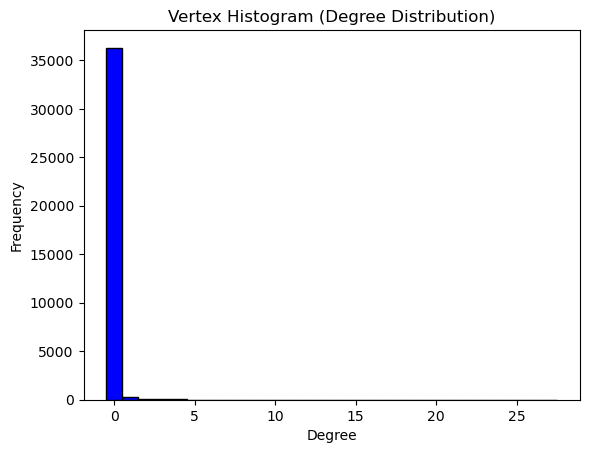

In [10]:
g = gt.load_graph('/mnt/disk2/Data/3_Day_Graphs/2021-05-01.graphml')
deg = gt.vertex_hist(g,'total',bins=[0,200])
plt.figure()
plt.bar(range(len(deg[0])), deg[0], width=1.0, color='b', edgecolor='black')
plt.title('Vertex Histogram (Degree Distribution)')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

In [51]:
files = glob('/mnt/disk2/Data/3_Day_Graphs/*.graphml')

ls = []
vertex = True
for file in files:
    # Get date
    date = file.split('/')[-1].split('.')[0]
    date = datetime.strptime(date, '%Y-%m-%d')
    g = gt.load_graph(file)
    
    # Get Node Degrees Average
    for stat in ['in', 'out']: 
        vertex_average = gt.vertex_average(g, stat)
        row = [vertex_average[0], vertex_average[1], date, stat]
        ls.append(row)
        
    # Get Edge Propety Average
    for stat in dict(g.ep).items():
        edge_average = gt.edge_average(g, stat[1])
        row = [edge_average[0], edge_average[1], date, stat[0]]
        ls.append(row)

# Get Visualization
viz = pd.DataFrame(ls, columns=['Average','SE','Date', 'Type'])

# Get Confidence Interval
viz['Lower'] = viz['Average'] - 1.96*viz['SE']
viz['Upper'] = viz['Average'] + 1.96*viz['SE']
viz = viz.set_index('Date')
viz = viz.sort_index()

/tmp/ipykernel_578458/3744972097.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_deg.sort_index(inplace=True)
/tmp/ipykernel_578458/3744972097.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_deg.sort_index(inplace=True)


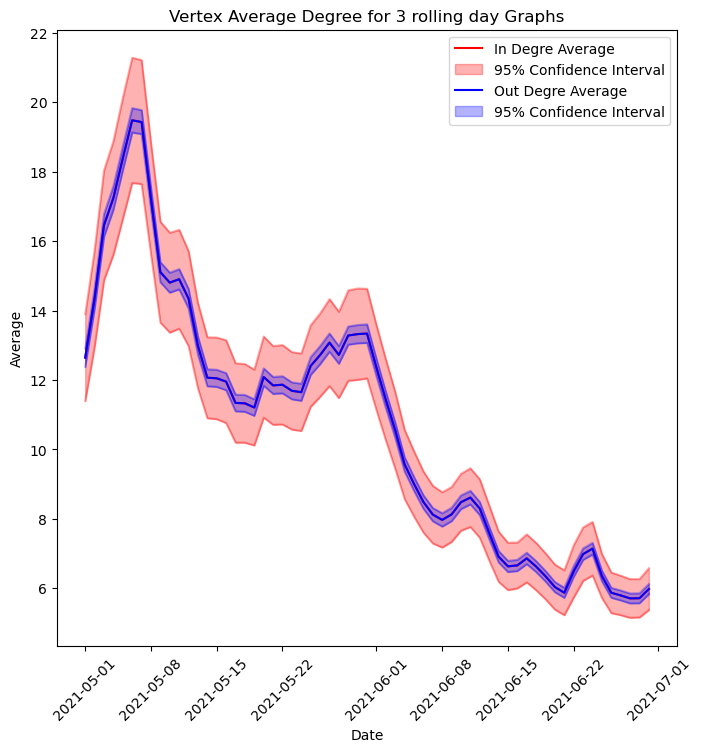

In [7]:
# Separate Types
in_deg = viz[viz['Type'] == 'in']
out_deg = viz[viz['Type'] == 'out']

# GRAAAAAPH
fig, ax = plt.subplots(figsize=(8, 8))

# In Graph
sns.lineplot(data=in_deg, x=in_deg.index, y='Average', color='red', ax=ax, label='In Degre Average')
sns.lineplot(data=in_deg, x=in_deg.index, y='Lower', color='red', ax=ax, alpha=0.3, label='_nolegend_')
sns.lineplot(data=in_deg, x=in_deg.index, y='Upper', color='red', ax=ax, alpha=0.3, label='_nolegend_')

plt.fill_between(in_deg.index, in_deg['Lower'], in_deg['Upper'], color='red', alpha=0.3, label='95% Confidence Interval')

# Out Graph
sns.lineplot(data=out_deg, x=out_deg.index, y='Average', color='blue', ax=ax, label='Out Degre Average')
sns.lineplot(data=out_deg, x=out_deg.index, y='Lower', color='blue', ax=ax, alpha=0.3, label='_nolegend_')
sns.lineplot(data=out_deg, x=out_deg.index, y='Upper', color='blue', ax=ax, alpha=0.3, label='_nolegend_')

plt.fill_between(out_deg.index, out_deg['Lower'], out_deg['Upper'], color='blue', alpha=0.3, label='95% Confidence Interval')

# Labels
plt.title('Vertex Average Degree for 3 rolling day Graphs')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Text(0.5, 0.98, 'Edge Properties Statistics for 3 rolling day Graphs')

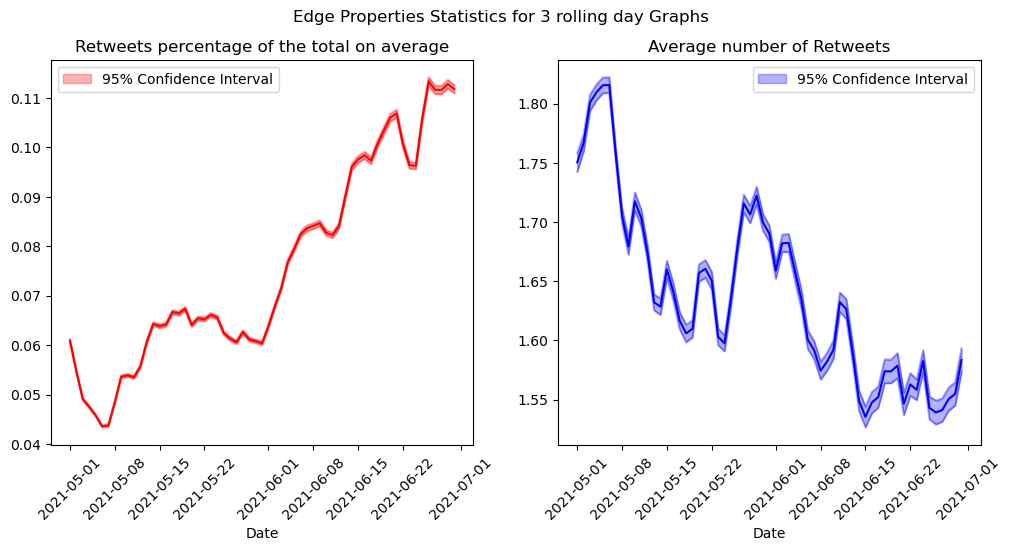

In [52]:
# Separate Types
normal = viz[viz['Type'] == 'Normal Weights']
number = viz[viz['Type'] == 'Number of Retweets']

# GRAAAAAPH
fig, ax = plt.subplots(1,2,figsize=(12, 5))

# In Graph
sns.lineplot(data=normal, x=normal.index, y='Average', color='red', ax=ax[0], label='_nolegend')
sns.lineplot(data=normal, x=normal.index, y='Lower', color='red', ax=ax[0], alpha=0.3, label='_nolegend_')
sns.lineplot(data=normal, x=normal.index, y='Upper', color='red', ax=ax[0], alpha=0.3, label='_nolegend_')

ax[0].fill_between(normal.index, normal['Lower'], normal['Upper'], color='red', alpha=0.3, label='95% Confidence Interval')

ax[0].set_title('Retweets percentage of the total on average')
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_ylabel('')
ax[0].legend()

# Out Graph
sns.lineplot(data=number, x=number.index, y='Average', color='blue', ax=ax[1], label='_nolegend_')
sns.lineplot(data=number, x=number.index, y='Lower', color='blue', ax=ax[1], alpha=0.3, label='_nolegend_')
sns.lineplot(data=number, x=number.index, y='Upper', color='blue', ax=ax[1], alpha=0.3, label='_nolegend_')

ax[1].fill_between(number.index, number['Lower'], number['Upper'], color='blue', alpha=0.3, label='95% Confidence Interval')

ax[1].set_title('Average number of Retweets')
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_ylabel('')
ax[1].legend()
fig.suptitle('Edge Properties Statistics for 3 rolling day Graphs')